# 0. Data Formats

## Learning objectives
- Understand the basic file formats/uses of CSV, XLSX and JSON.
- Know how to import them into pandas

# Data I/O

- Data Input/Output is a key part of pandas, as often you will be obtaining data which must be imported into pandas or exporting data cleaned in pandas.
- This data can come from a variety of file formats, although most of the time it will only come from a few of them which we cover here.
- We will cover importing from and exporting to CSV and XLSX files, which are the most common forms of data.
- There are other methods such as for html files, SQL, tables, JSON etc, which you can find out about as and when you need them.
- The methods are .read_ or .to_ methods, with numerous arguments that you can specify as they are required.
- The essential argument is the filename as a string, which must be in the same directory, or have the whole file path specified.
- When writing files, index=False is also useful to avoid replication of the index column, as pandas automatically adds an index when it reads in a file.

## CSV
- CSV __(comma-separated values)__ files are a very common way to store data. 
- Their most common literal representation is a bunch of values, separated by commas, as the name would indicate.
- All of the data for a single observation is on one line: each new line is a new observation.
- Hence the number of values in a line is the number of columns, and the number of lines is the number of rows.
- Hence, the first line is often column names, but it does not have to be.
- The comma in this case is called the __'delimiter'__ as it shows the difference (or limit) between one value and the next.
- Other common delimiters are semi-colons and tabs (also called tsv/tab-separated values).
- Usually if you are using data from mainland European countries (France/Spain etc) they will use semi-colons, hence some people prefer __character__-separated values for CSV.
- We must be careful to check what exactly the delimiter is, as a common error is reading in a file with the wrong delimiter, and so getting a weird representation in your data.
- CSVs can also be read by Excel.
- The read_csv command only requires the CSV format not necessarily the filename extension, and so it can read in .txt files in the same format.
- When using it we can specify only the filename if the file is in the same directory, but we must specify the whole path if it is in another directory. This same process applies to any files read or written using Python.
- Below we can see a representation of a CSV file in text format:

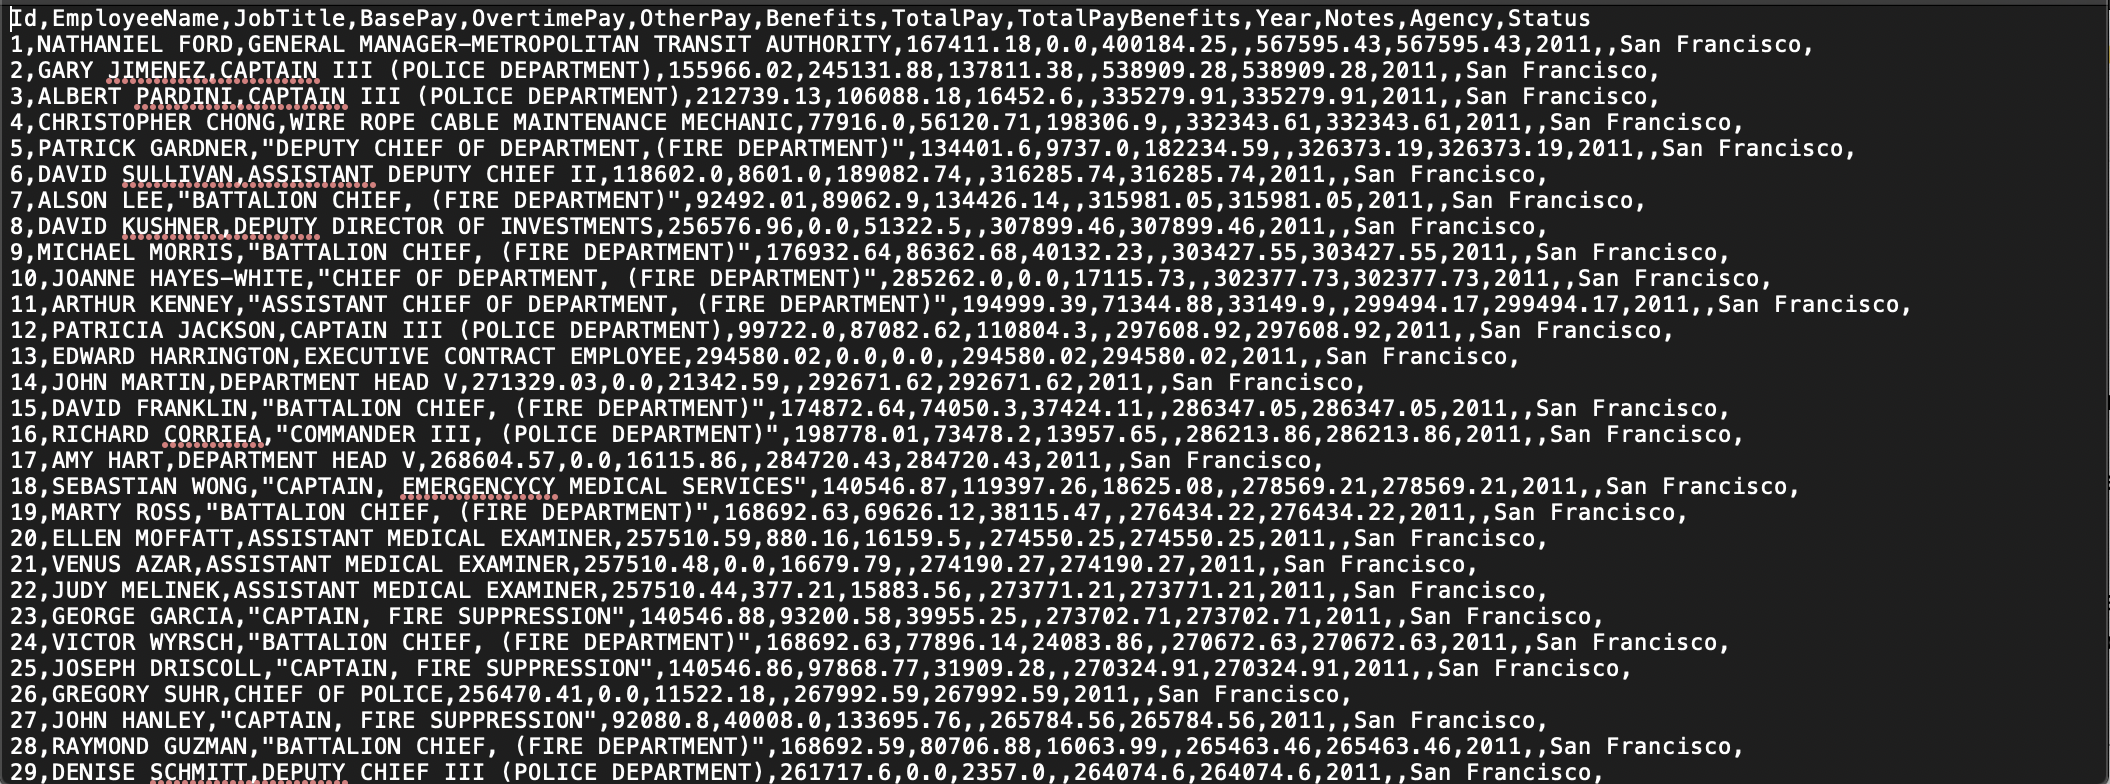

The syntax for reading in a CSV to pandas is thus:

In [ ]:
# we save the read_csv to a variable
df = pd.read_csv('<filename>')

# the to_csv method is a method off a data frame
df.to_csv('<filename>',index=False)

Example:

In [1]:
# import pandas
import pandas as pd


# read in the csv file
df = pd.read_csv('Salaries.csv')

# show as DataFrame
df.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


## XLSX
- .xlsx is the file format for Microsoft Excel spreadsheets.
- This does not require much explanation except to say that pandas cannot read in formulas, macros or graphs, only raw data.
- Also, we must specify the sheetname to read in as a data frame or write to when using the read_excel and to_excel methods.

In [ ]:
# read_excel has the same file stipulations as all read_ methods
df = pd.read_excel('<filename>',sheet_name='<sheetname>')

# remember to specify sheet name with Excel files
df.to_excel('<filename>',sheet_name='<sheetname>')

## JSON
- JSON (JavaScript Object Notation) is a file format that stores data in a way that is easily readable by both humans and machines.
-  It is as useful way for a browser and a server to exchange data, so it is used extensively in Web-based applications of coding.
- In fact, Jupyter Notebook .ipynb files are actually stored in JSON format.
- Pandas can also read and write from and to JSON using the following commands.
- We can see a JSON file in a text editor below:

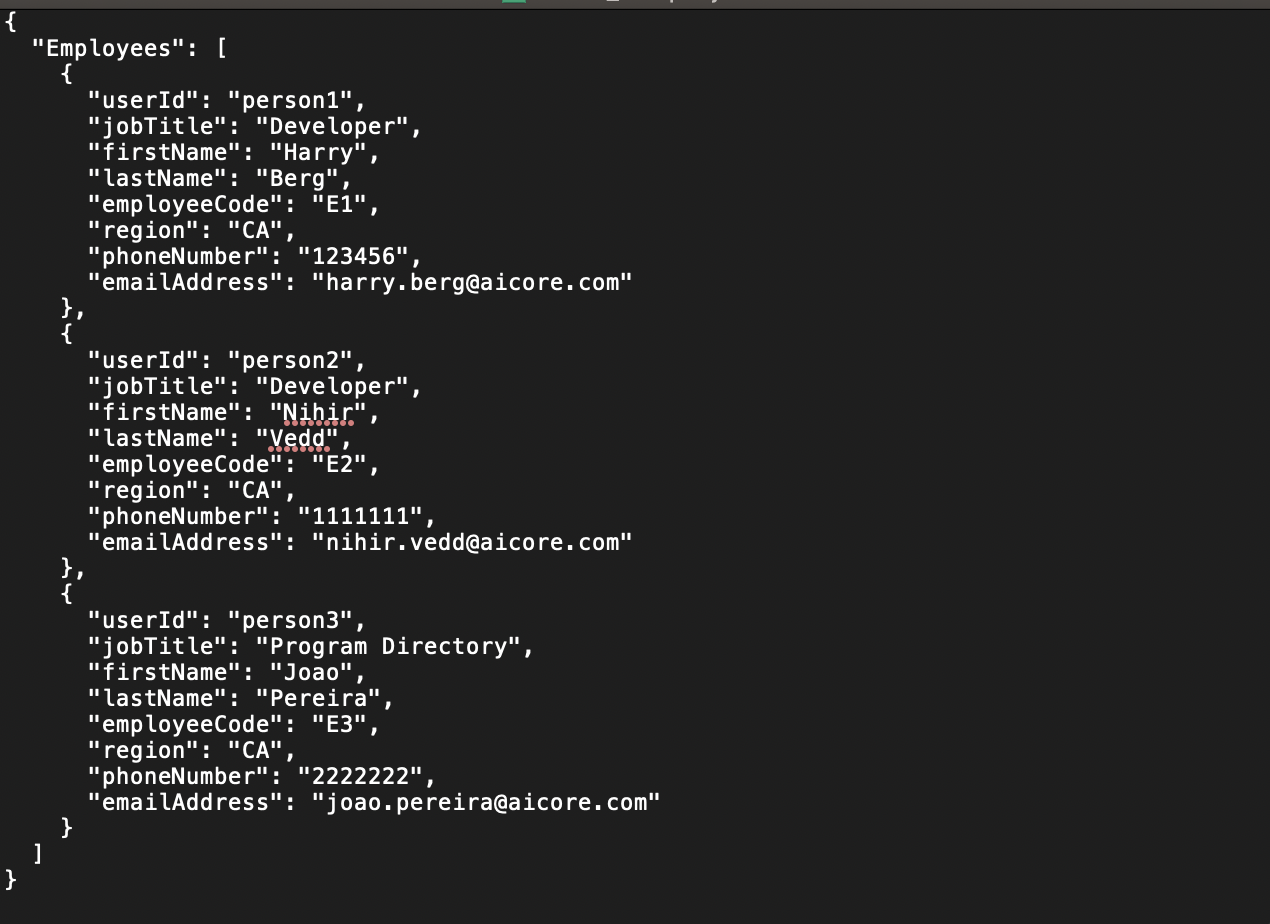

In [ ]:
# json
df = pd.read_json('<filename>')
df.to_json('<filename>')

Example:

In [22]:
# import pandas
import pandas as pd


# read in the csv file
df = pd.read_json('JSON_sample.json')

# show as DataFrame
df.head()

,Employees
0,"{'userId': 'person1', 'jobTitle': 'Developer',..."
1,"{'userId': 'person2', 'jobTitle': 'Developer',..."
2,"{'userId': 'person3', 'jobTitle': 'Program Dir..."


## Summary
- We now understand the basic file formats of CSV/XLSX/JSON.
- We now know how to read them into pandas.

## Further reading
The only further reading for this section is below, on importing XML files. Understanding how, why and when to do this requires some understanding of pandas, so it is recommended that you wait until you have some practise with pandas before attempting to learn this.

## Reference only: XML
- XML (eXtensible Markup Language) is another way of exchanging data between browsers and servers (JSON is an alternative to XML).
- Hence, like with JSON, we can use XML to obtain data from the web.
- XML is a markup language like HTML, so it contains data, and information on how to structure that data, but not how it is displayed.
- Hence we need an API to extract data from an XML file, and so there is no simple method to read an XML into pandas.
- You can use the following process although it is not the only possible way to do it:

- You can use this premade function to parse in XML files, which requires only 2 arguments:
    - The XML filename
    - The columns of the data frame (the fields in each observation in the XML file)

In [3]:
import pandas as pd
import xml.etree.ElementTree as et

def parse_XML(xml_file, df_cols): 
    """Parse the input XML file and store the result in a pandas 
    DataFrame with the given columns. 
    
    The first element of df_cols is supposed to be the identifier 
    variable, which is an attribute of each node element in the 
    XML data; other features will be parsed from the text content 
    of each sub-element. 
    """
    
    xtree = et.parse(xml_file)
    xroot = xtree.getroot()
    rows = []
    
    for node in xroot: 
        res = []
        res.append(node.attrib.get(df_cols[0]))
        for el in df_cols[1:]: 
            if node is not None and node.find(el) is not None:
                res.append(node.find(el).text)
            else: 
                res.append(None)
        rows.append({df_cols[i]: res[i] 
                     for i, _ in enumerate(df_cols)})
    
    out_df = pd.DataFrame(rows, columns=df_cols)
        
    return out_df

In [10]:
df = parse_XML("employees.xml", ["name", "email", "department", "age"])
df

,name,email,department,age
0,Alpha,alpha@aicore.com,HR,36
1,Bravo,bravo@aicore.com,sales,23
2,Charlie,charlie@aicore.com,accounts,44
3,Delta,delta@aicore.com,reception,51
